<font face="B Mitra" size=4>
<div dir=rtl align=center>

<br>
<img src="https://aut.ac.ir/templates/tmpl_modern01/images/logo_fa.png" alt="Amirkabir University Logo" width="100">

<br>
<font size=2>
<b>دانشگاه صنعتی امیرکبیر - دانشکده ریاضی و علوم کامپیوتر</b>
</font>

<br>
<font size=6>
<b> جبرخطی کاربردی</b>
</font>

<br>
<hr/>
<font size=6>
<b>پروژه دوم</b>
</font>

</div>
</font>

<font face="B Mitra" size=5>
<div dir=rtl>

<p>
<font size=5>
لطفا فایل زیپ نهایی را با الگوی زیر در سامانه کورسز آپلود کنید.
</font>
</p>

<div dir=ltr>
<font face="Times New Roman" size=5 dir=ltr>
شماره دانشجویی_PRJ2.zip
</font>
</div>


<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>
 پروژه محاسبه رتبه صفحات (PageRank) در این پروژه، شما باید الگوریتم "PageRank" را پیاده‌سازی کنید. این الگوریتم برای رتبه‌بندی صفحات وب استفاده می‌شود و با محاسبه بردار ویژه (Eigenvector) و مقدار ویژه (Eigenvalue) از ماتریس پیوندها عمل می‌کند.
</font>
</p>


<font face="B Mitra" size=5>
<div dir=rtl>

<style>
    body {
        font-family: 'Vazir', sans-serif;
        direction: rtl;
        text-align: right;
    }
</style>
### بخش اول: پیاده‌سازی Parser

در این بخش، شما باید کدی بنویسید که داده‌های مربوط به پیوندهای بین صفحات را استخراج کند که بتوانید در مرحله بعدی با استفاده از این اطلاعات ماتریس پیوندها را بسازید. ابتدا باید فایل‌های HTML را از پوشه "Pages" بارگذاری کنید و پیوندهای موجود در آن‌ها را پیدا کنید.

در این قسمت، شما باید یک تابع `()parse_page_links` را پیاده‌سازی کنید که فایل‌ها را خوانده و پیوندها را شناسایی کند. این پیوندها به شما کمک می‌کنند تا ماتریس پیوندها بین صفحات را بسازید.


</div>
</font>

In [4]:
import os
import re


def parse_page_links():
    pages_dir = "Pages"
    if not os.path.exists(pages_dir):
        raise FileNotFoundError(f"Directory '{pages_dir}' does not exist!")

    links = {}
    for file_name in os.listdir(pages_dir):
        if file_name.endswith(".html"):
            page_name = file_name.split(".")[0]
            links[page_name] = []
            with open(os.path.join(pages_dir, file_name), "r", encoding="utf-8") as file:
                content = file.read()
                # Updated regex to match `link:to:<PageNumber>` format
                page_links = re.findall(r'link:to:(Page\d+)', content)
                links[page_name].extend(page_links)
    return links

parse_page_links()

{'Page1': ['Page2', 'Page4'],
 'Page5': ['Page4'],
 'Page4': ['Page4', 'Page1', 'Page3', 'Page2', 'Page5'],
 'Page3': ['Page1'],
 'Page2': ['Page1', 'Page3', 'Page4']}

<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

### بخش دوم: ساخت ماتریس پیوندها

در الگوریتم PageRank، ماتریس پیوندها یا ماتریس احتمال، ماتریسی مربعی است که اندازه آن برابر با تعداد صفحات (n × n) است. هر عنصر در این ماتریس، احتمال وجود لینک از یک صفحه به صفحه دیگر را نشان می‌دهد. در ادامه نحوه ساخت این ماتریس توضیح داده شده است:

#### تعریف ماتریس:

- **سطرها (Rows):** نشان‌دهنده صفحات مقصد (صفحه‌ای که به آن لینک داده می‌شود).
- **ستون‌ها (Columns):** نشان‌دهنده صفحات مبدأ (صفحه‌ای که لینک از آن آغاز می‌شود).
- **عناصر ماتریس (M<sub>ij</sub>):**
  - اگر صفحه j به صفحه i لینک داده باشد: مقدار آن برابر است با احتمال انتقال، یعنی 1 تقسیم بر تعداد کل لینک‌های خروجی از صفحه j.
  - اگر صفحه j به صفحه i لینک ندهد: مقدار آن برابر با 0 است.

#### ویژگی‌های ماتریس:

1. **ستون-محور بودن:** مقادیر هر ستون باید به 1 نرمال‌سازی شوند (مجموع مقادیر هر ستون برابر با 1 باشد). این موضوع نشان‌دهنده احتمال انتقال است.
2. **لینک‌های گمشده:** اگر صفحه‌ای هیچ لینک خروجی نداشته باشد (ستونی با مقادیر صفر)، باید فرض کنید که احتمال انتقال به تمام صفحات برابر است (توزیع یکنواخت).

#### مثال:

فرض کنید 3 صفحه داریم:

- **صفحه 1** به صفحات 2 و 3 لینک می‌دهد.
- **صفحه 2** فقط به صفحه 3 لینک می‌دهد.
- **صفحه 3** هیچ لینکی ندارد.

ماتریس پیوندها به این صورت خواهد بود:

| **صفحات** | **صفحه 1** | **صفحه 2** | **صفحه 3** |
|------------|------------|------------|------------|
| **صفحه 1** | 0          | 0          | 1/3        |
| **صفحه 2** | 1/2        | 0          | 1/3        |
| **صفحه 3** | 1/2        | 1          | 1/3        |

**توضیح:**

- ستون اول نشان می‌دهد که صفحه 1 به صفحات 2 و 3 لینک داده و به صفحه 1 لینک نمی‌دهد.
- ستون دوم نشان می‌دهد که صفحه 2 فقط به صفحه 3 لینک داده است.
- ستون سوم نشان می‌دهد که صفحه 3 هیچ لینک خروجی ندارد، بنابراین مقادیر ستون به‌صورت یکنواخت بین تمام صفحات تقسیم شده است.

در این قسمت شما باید یک تابع `()construct_link_matrix` را پیاده‌سازی کنید که با استفاده از اطلاعات استخراج شده از قسمت قبلی ماتریس پیوندها را بسازد.

</font>
</p>
</div>
</font>

In [10]:
import numpy as np

def construct_link_matrix():
    """
    Construct the link matrix from the extracted page links.

    Returns:
        np.ndarray: The link matrix.
    """
    links = parse_page_links()
    pages = sorted(links.keys(), key=lambda x: int(x[4:]))
    n = len(pages)
    page_index = {page: idx for idx, page in enumerate(pages)}

    link_matrix = np.zeros((n, n))
    for page, linked_pages in links.items():
        if linked_pages:
            for linked_page in linked_pages:
                link_matrix[page_index[linked_page], page_index[page]] = 1 / len(linked_pages)
        else:
            # Handle dangling pages: distribute links evenly to all pages
            link_matrix[:, page_index[page]] = 1 / n

    return link_matrix

construct_link_matrix()

array([[0.        , 0.33333333, 1.        , 0.2       , 0.        ],
       [0.5       , 0.        , 0.        , 0.2       , 0.        ],
       [0.        , 0.33333333, 0.        , 0.2       , 0.        ],
       [0.5       , 0.33333333, 0.        , 0.2       , 1.        ],
       [0.        , 0.        , 0.        , 0.2       , 0.        ]])

<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

### بخش سوم: محاسبه مقدار ویژه و بردار ویژه ماتریس پیوندها

در محاسبات PageRank، به دنبال حالتی پایدار هستیم که در آن توزیع بازدیدکنندگان از صفحات تغییری نکند. فرمول اولیه:

r<sub>i</sub> = ∑(r<sub>j</sub> / N<sub>j</sub>) برای تمام j ∈ I<sub>i</sub>

(مجموعه I<sub>i</sub> بیانگر صفحاتی هستند که در هر یک از آنها به i لینک وجود دارد.)

این فرمول بیانگر این است که مقدار رتبه هر صفحه به رتبه صفحات ورودی به آن وابسته است. این فرمول می‌تواند به شکل ماتریسی زیر نوشته شود:

A * r = λ * r

- A: ماتریس احتمال انتقال (یا ماتریس پیوندها).
- r: بردار رتبه صفحات (بردار ویژه).
- λ: مقدار ویژه.

#### هدف:
محاسبه بردار ویژه (r) و مقدار ویژه (λ) ماتریس پیوندها (A)، به گونه‌ای که نشان‌دهنده حالت پایدار سیستم باشد.

#### نکات کلیدی:
- بردار رتبه (r) باید نرمال‌سازی شود، به گونه‌ای که مجموع مقادیر آن برابر با 1 باشد.
- در حالت پایدار، مقدار ویژه (λ) باید برابر با 1 باشد، زیرا مجموع احتمال‌های انتقال ثابت است.

#### روش محاسبه:
1. از روش‌های عددی برای محاسبه مقدار ویژه و بردار ویژه ماتریس استفاده کنید.
2. از کتابخانه‌های مناسب مانند **NumPy** یا **SciPy** برای محاسبات بهره ببرید.
3. بررسی کنید که آیا بردار رتبه به حالت همگرا رسیده است یا خیر.

#### پیاده‌سازی:
در این بخش شما باید یک تابع `()solve_eigen_problem` را پیاده‌سازی کنید که مقادیر ویژه و بردارهای ویژه ماتریس پیوندها را با استفاده از معادله بالا پیدا کند.

توجه کنید که این قسمت را باید خودتان پیاده سازی کنید و تنها مجاز به استفاده از numpy هستید.
</font>
</p>
</div>
</font>

In [11]:
def solve_eigen_problem(matrix):
    """
    Solve the eigenvalue problem to find the dominant eigenvector.

    Args:
        matrix (np.ndarray): The link matrix.

    Returns:
        np.ndarray: The dominant eigenvector.
    """
    eigvals, eigvecs = np.linalg.eig(matrix)
    dominant_index = np.argmax(eigvals)
    dominant_vector = eigvecs[:, dominant_index].real
    return dominant_vector / np.sum(dominant_vector)  # Normalize to sum to 1

<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

### بخش چهارم: محاسبه بردار ویژه با روش توان (Power Method)

روش توان برای محاسبه بردار ویژه متناظر با بزرگ‌ترین مقدار ویژه یک ماتریس استفاده می‌شود. در PageRank، ماتریس انتقال (A) به صورت ستونی-تصادفی (Column-Stochastic) تعریف شده است، بنابراین مقدار ویژه غالب برابر ۱ است. از این رو، می‌توانیم از روش توان برای محاسبه بردار ویژه استفاده کنیم.

### ایده کلی:

1. فرض می‌کنیم یک بردار اولیه دلخواه \( v_0 \) داریم.
2. بردار \( v \) را با ضرب ماتریس \( A \) در \( v_0 \) به‌روزرسانی می‌کنیم:
   \( v_{k+1} = A v_k \)
3. در هر گام، \( v_{k+1} \) را نرمال‌سازی می‌کنیم تا طول آن ثابت باشد:
   \( v_{k+1} = \frac{v_{k+1}}{\|v_{k+1}\|} \)
4. این فرآیند را تکرار می‌کنیم تا بردار \( v \) به یک مقدار پایدار (بردار ویژه) همگرا شود.

### مراحل پیاده‌سازی:

1. مقدار اولیه بردار \( v_0 \) را به‌صورت یکنواخت (Uniform) انتخاب کنید، به طوری که مجموع مقادیر آن برابر ۱ باشد.
2. حلقه‌ای ایجاد کنید که در هر گام بردار جدید \( v_{k+1} \) را محاسبه کرده و نرمال‌سازی کند.
3. معیار توقف را تعیین کنید (مثلاً وقتی تغییرات بین \( v_k \) و \( v_{k+1} \) از یک حد مشخص کمتر شد، الگوریتم متوقف شود).
4. مقدار نهایی \( v \) بردار ویژه متناظر با مقدار ویژه ۱ است.

#### نکات مهم:

- ماتریس انتقال (A) باید به درستی ستون-محور باشد (مجموع هر ستون برابر با ۱ باشد).
- برای پیاده‌سازی، از کتابخانه‌های پایتون مانند **NumPy** برای ضرب ماتریس و نرمال‌سازی بردارها استفاده کنید.
- معیار همگرایی را می‌توانید بر اساس **تفاضل اقلیدسی** یا **تفاضل مقدار بردار** تعیین کنید.

#### پیاده‌سازی:
در این بخش شما باید یک تابع `()power_method` را پیاده‌سازی کنید که بردار ویژه متناظر با مقدار ویژه ۱ ماتریس انتقال را محاسبه کند.

</font>
</p>
</div>
</font>

In [12]:
def power_method(matrix, tol=1e-6, max_iter=100):
    """
    Use the power method to compute the dominant eigenvector.

    Args:
        matrix (np.ndarray): The link matrix.
        tol (float): Convergence tolerance.
        max_iter (int): Maximum number of iterations.

    Returns:
        np.ndarray: The dominant eigenvector.
    """
    n = matrix.shape[0]
    vector = np.ones(n) / n  # Start with a uniform vector

    for _ in range(max_iter):
        new_vector = matrix @ vector
        new_vector /= np.sum(new_vector)  # Normalize
        if np.linalg.norm(new_vector - vector) < tol:
            break
        vector = new_vector

    return vector

<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

### بخش ششم: نمایش نتایج جستجو

در این بخش، شما باید نتایج جستجو را نمایش دهید. پس از محاسبه بردار ویژه از قسمت‌های ۳ و ۴ و مقایسه مقادیر آنها، باید صفحات را بر اساس مقادیر موجود در بردار ویژه مرتب کنید و رتبه‌بندی نهایی را نشان دهید.

#### مراحل نمایش نتایج:
1. **مرتب‌سازی صفحات:** مقادیر بردار ویژه را به همراه شناسه صفحات مرتب کنید (نزولی) تا بالاترین رتبه در بالای لیست قرار گیرد.
2. **نمایش رتبه‌بندی:** صفحات را با ذکر رتبه و مقدار بردار ویژه آنها به صورت لیستی نمایش دهید.
3. **قالب‌بندی نتایج:** برای هر صفحه، اطلاعات مربوط به رتبه، شناسه صفحه، و مقدار اهمیت (از بردار ویژه) را به شکلی خوانا ارائه کنید.

#### مثال:
فرض کنید بردار ویژه نهایی به صورت زیر است:
\[ r = [0.4, 0.3, 0.2, 0.1] \]
اگر صفحات به ترتیب \[Page 1, Page 2, Page 3, Page 4\] نام‌گذاری شده باشند، نتایج نمایش داده‌شده به این شکل خواهد بود:

| **رتبه** | **شناسه صفحه** | **اهمیت (PageRank)** |
|-----------|----------------|----------------------|
| 1         | Page 1         | 0.4                  |
| 2         | Page 2         | 0.3                  |
| 3         | Page 3         | 0.2                  |
| 4         | Page 4         | 0.1                  |

#### نکات مهم:
- **نرمال‌سازی نهایی:** اطمینان حاصل کنید که مقادیر بردار ویژه در مجموع برابر ۱ باشد (نمایش به صورت احتمال).
- **قابلیت جستجو:** در صورت نیاز، قابلیت فیلتر کردن یا جستجوی صفحات خاص را به نتایج اضافه کنید.
- **فرمت‌بندی گرافیکی:** در صورت امکان، نتایج را به صورت نمودار ستونی یا دیگر اشکال بصری نمایش دهید تا خوانایی بهبود یابد.

</font>
</p>
</div>
</font>

In [16]:
import numpy as np
matrix = construct_link_matrix()
eigenvector1 = power_method(matrix)
eigenvector2 = solve_eigen_problem(matrix)
print("\nPower Method Results:")
for page in np.argsort(eigenvector1)[::-1]:
    print("Page " + str(page + 1))

print("\nSearch Results:")
for page in np.argsort(eigenvector2)[::-1]:
    print("Page " + str(page + 1))


Power Method Results:
Page 4
Page 1
Page 2
Page 3
Page 5

Search Results:
Page 4
Page 1
Page 2
Page 3
Page 5


<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

در این بخش، شما باید نتایج PageRank و امتیازات اختصاصی صفحات را به صورت نمودار ستونی نمایش دهید. این نمایش گرافیکی به شما کمک می‌کند تا تفاوت مقادیر PageRank و امتیازات صفحات را به صورت بصری مشاهده کنید.

#### مراحل نمایش گرافیکی:
1. **دسته‌بندی مقادیر:** مقادیر PageRank و امتیازات هر صفحه را به ترتیب مرتب کنید.
2. **رسم نمودار ستونی:** برای هر صفحه دو مقدار PageRank و امتیاز اختصاصی در کنار هم رسم کنید.
3. **برچسب‌گذاری محورها:** محور افقی به صفحات و محور عمودی به مقادیر اختصاص داده شود.
4. **استفاده از رنگ‌های متفاوت:** برای نمایش PageRank و امتیازها از رنگ‌های متفاوت استفاده کنید تا تفاوت‌ها مشخص باشد.

#### نکات مهم:
- مطمئن شوید که صفحات بر اساس مقادیر PageRank مرتب شده‌اند.
- برچسب‌ها و عنوان‌های مناسب برای نمودار اضافه کنید.
- از ابزارهای استاندارد پایتون مانند `matplotlib` برای رسم نمودار استفاده کنید.

</font>
</p>
</div>
</font>

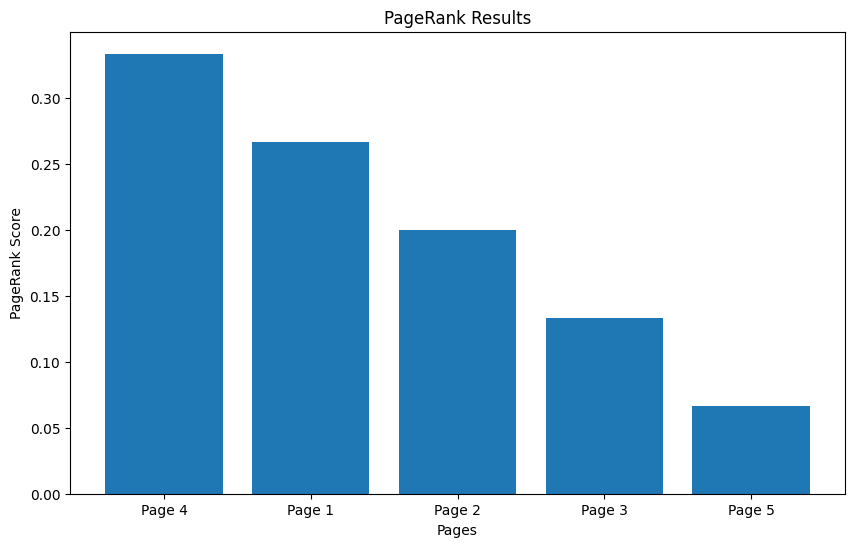

In [14]:
import matplotlib.pyplot as plt
def visualize_pagerank(pages, scores):
    """
    Visualizes the PageRank scores using a bar chart.

    Args:
        pages (list): A list of page identifiers (e.g., ["Page 1", "Page 2", ...]).
        scores (list or np.array): The corresponding PageRank scores for the pages.
    """
    # Sort pages and scores based on scores in descending order
    sorted_indices = np.argsort(scores)[::-1]
    sorted_pages = [pages[i] for i in sorted_indices]
    sorted_scores = [scores[i] for i in sorted_indices]

    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(sorted_pages, sorted_scores)
    plt.xlabel("Pages")
    plt.ylabel("PageRank Score")
    plt.title("PageRank Results")
    plt.show()
    
pages = [f"Page {i + 1}" for i in range(len(matrix))]
scores = power_method(matrix)  # Replace with the result from `solve_eigen_problem` if needed

# Visualize the PageRank scores
visualize_pagerank(pages, scores)

<font face="B Mitra" size=10>
<div dir=rtl>
<p>
<font size=5>

(امتیازی)

در این بخش، شما باید وزن اختصاصی به هر لینک بین صفحات اضافه کنید تا تأثیر آن لینک در الگوریتم PageRank متناسب با وزن آن باشد. این بخش به شما کمک می‌کند رتبه‌بندی صفحات را با دقت بیشتری انجام دهید.

#### سؤالات:
1. **تعریف وزن‌ها:** برای هر لینک بین صفحات چگونه می‌توان وزن مناسب اختصاص داد؟ مثالی ارائه دهید. برای استفاده از وزن‌ها از دایرکتوری WeightedPages استفاده کنید.
2. **ساخت ماتریس پیوندها:** نحوه به‌روزرسانی ماتریس پیوندها با در نظر گرفتن وزن‌ها چگونه است؟ فرمولی برای این کار بنویسید.
3. **نرمال‌سازی:** چرا باید مجموع وزن‌های خروجی هر صفحه برابر با ۱ باشد؟ الگوریتمی برای نرمال‌سازی ماتریس پیشنهاد کنید.
4. **محاسبه PageRank:** با استفاده از ماتریس وزنی، الگوریتمی برای محاسبه PageRank بنویسید.
5. **نمایش نتایج:** چگونه می‌توان تأثیر وزن‌ها بر رتبه‌بندی صفحات را تحلیل و نمایش داد؟ به صورت نمودار ستونی توضیح دهید.

#### نکات مهم:
- وزن هر لینک متناسب با اهمیت آن است.
- نرمال‌سازی وزن‌ها به دقت الگوریتم کمک می‌کند.
- نمایش بصری نتایج باعث می‌شود تفاوت رتبه‌ها واضح‌تر باشد.

</font>
</p>
</div>
</font>